<h1> LABORATORIO 5 REDES NEURONALES </h1>
<h1> LOAIZA CORONADO RODRIGO JAIRO </h1>
<h1> ING  DE SISTEMAS</h1>

In [1]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
import torchvision


# Librerias de Pythorch
import torch
from torch import optim  # Para optimizadores como SGD, Adam, etc.
from torch import nn  # Todos los módulos de redes neuronales
from torch.utils.data import DataLoader  # Proporciona una gestión de conjuntos de datos más sencilla mediante la creación de mini lotes, etc.
import torchvision # paquete de antorcha para cosas relacionadas con la visión
import torchvision.transforms as transforms  # Transformaciones que podemos realizar en nuestro conjunto de datos para aumentarlo
import torch.nn.functional as F  # Funciones sin parámetros, como (algunas) funciones de activación
import torchvision.datasets as datasets  # Standard datasets
from tqdm import tqdm  # ¡Para una buena barra de progreso!
from torch.utils.data import TensorDataset, DataLoader

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/sign_mnist_train.csv', delimiter=',')
df_test = pd.read_csv('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/sign_mnist_test.csv', delimiter=',')
# Configurar Pandas
pd.set_option('display.max_rows', 100)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

# Mostramos los datos de entrenamiento
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [6]:
# Datos de entrenamiento del 80%
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
# Datos del prueba del 20 %
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
print('=' * 100)
print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Cantidad de ejemplos del 80% para el entrenamiento es de: 27455
Cantidad de ejemplos del 20% para la prueba es de: 7172


In [7]:
#Cantidad de Clases Y
df_train['label'].value_counts()


label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

In [8]:
print("Datos de entrenamiento")
X_train

Datos de entrenamiento


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pix

In [9]:
# Número de ejemplos de entrenamiento
m = y_train.size


In [10]:
# Cargar datos de entrenamiento y prueba
X_train = torch.tensor(df_train.drop('label', axis=1).values, dtype=torch.float32)
y_train = torch.tensor(df_train['label'].values, dtype=torch.int64)

X_test = torch.tensor(df_test.drop('label', axis=1).values, dtype=torch.float32)
y_test = torch.tensor(df_test['label'].values, dtype=torch.int64)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([27455, 784])
torch.Size([27455])
torch.Size([7172, 784])
torch.Size([7172])


In [11]:
# Normalizamos los datos de entremiento y los datos de prueba
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Mostramos los datos normalizados
print(X_train_norm[0])
print(X_test_norm[0])

tensor([0.4196, 0.4627, 0.4980, 0.5255, 0.5451, 0.5608, 0.5725, 0.5882, 0.6000,
        0.6118, 0.6196, 0.6275, 0.6392, 0.6471, 0.6235, 0.6510, 0.6588, 0.6667,
        0.6667, 0.6706, 0.6706, 0.6706, 0.6745, 0.6706, 0.6706, 0.6667, 0.6667,
        0.6627, 0.4353, 0.4745, 0.5059, 0.5294, 0.5529, 0.5647, 0.5804, 0.5922,
        0.6039, 0.6157, 0.6275, 0.6392, 0.6431, 0.6667, 0.4667, 0.5961, 0.6706,
        0.6706, 0.6667, 0.6706, 0.6745, 0.6745, 0.6745, 0.6745, 0.6745, 0.6706,
        0.6706, 0.6667, 0.4431, 0.4824, 0.5137, 0.5373, 0.5569, 0.5686, 0.5882,
        0.5961, 0.6078, 0.6196, 0.6314, 0.6392, 0.6431, 0.6745, 0.4118, 0.5569,
        0.6667, 0.6706, 0.6706, 0.6706, 0.6745, 0.6745, 0.6784, 0.6784, 0.6745,
        0.6706, 0.6706, 0.6706, 0.4549, 0.4902, 0.5216, 0.5451, 0.5608, 0.5725,
        0.5922, 0.6000, 0.6118, 0.6235, 0.6353, 0.6392, 0.6549, 0.6549, 0.3725,
        0.5647, 0.6706, 0.6745, 0.6745, 0.6745, 0.6745, 0.6745, 0.6784, 0.6784,
        0.6784, 0.6745, 0.6745, 0.6706, 

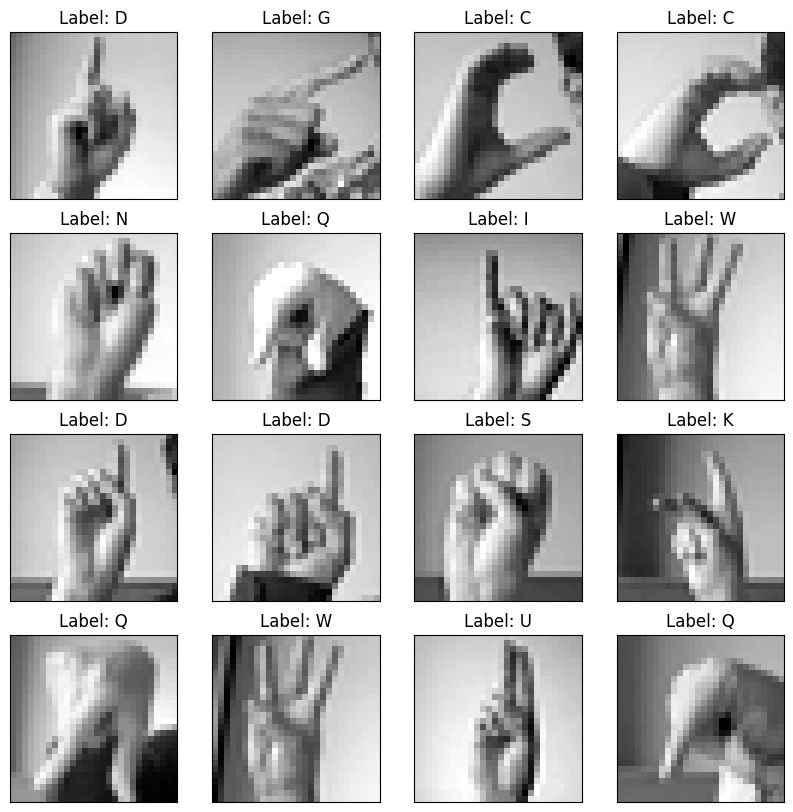

In [53]:
import string

# Función para convertir las etiquetas numéricas a letras
def convert_label_to_letter(label):
    letters = string.ascii_uppercase
    return letters[label]

# Función para mostrar imágenes con etiquetas de letras
def plot_images_with_letters(images, labels, nrows, ncols, figsize=(10, 10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        # Mostrar imagen
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])  # Eliminar marcas de ejes
        # Convertir la etiqueta numérica a letra
        letter_label = convert_label_to_letter(labels[i])
        ax.set_title(f"Label: {letter_label}")  # Mostrar la letra como etiqueta

# Seleccionar algunas imágenes normalizadas y sus etiquetas para mostrar
num_images_to_show = 16
images_to_show = X_train_norm[:num_images_to_show]
labels_to_show = y_train[:num_images_to_show]

# Graficar las imágenes con sus etiquetas de letras
plot_images_with_letters(images_to_show, labels_to_show, nrows=4, ncols=4)
plt.show()



In [56]:
class RedNeuronal(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RedNeuronal, self).__init__()

        # La primera capa lineal toma input_size nodos y los mapea a hidden_size nodos en la capa oculta
        self.fc1 = nn.Linear(input_size, hidden_size)

        # La segunda capa lineal toma hidden_size nodos en la capa oculta y los mapea a num_classes nodos en la capa de salida
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        return x


In [57]:
# Tamaños de los datos
input_size = X_train_norm.shape[1]  # Tamaño de entrada (número de características)
# Tamaño de la capa oculta
hidden_size = 128  # Ajusta este valor según tus necesidades
# Cantidad de clases en tu conjunto de datos
num_classes = 26
# Definir el tamaño del lote
batch_size = 64  # Por ejemplo, aquí se define como 64
# Definir el número de épocas
num_epochs = 10  # Por ejemplo, aquí se define como 10

# Mostrar los tamaños de los datos
print("Tamaño de la entrada:", input_size)
print("Tamaño de la capa oculta:", hidden_size)
print("Número de clases de salida:", num_classes)


# Definir la arquitectura de la red neuronal
class RedNeuronal(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Configurar el dispositivo cuda para GPU si está disponible; de lo contrario, ejecutar en la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Dispositivo:", device)

Tamaño de la entrada: 784
Tamaño de la capa oculta: 128
Número de clases de salida: 26
Dispositivo: cpu


In [58]:
# Crear conjuntos de datos de PyTorch usando TensorDataset
train_dataset = TensorDataset(X_train_norm, y_train)
test_dataset = TensorDataset(X_test_norm, y_test)

# Crear DataLoader personalizados para iterar sobre los datos
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
# Inicializamos la red neuronal
model = RedNeuronal(input_size, hidden_size, num_classes).to(device)

# Mostramos el modelo
model

RedNeuronal(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=26, bias=True)
)

In [59]:

# Definir la función de pérdida
criterion = nn.CrossEntropyLoss()

# Definir el optimizador
learning_rate = 0.001  # Por ejemplo, aquí se define como 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


 13%|█▎        | 55/429 [00:00<00:01, 268.48it/s]

Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Siz

 25%|██▌       | 109/429 [00:00<00:01, 259.03it/s]

Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Siz

 31%|███▏      | 135/429 [00:00<00:01, 226.67it/s]

Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Siz

 42%|████▏     | 181/429 [00:00<00:01, 194.46it/s]


Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64]

 52%|█████▏    | 222/429 [00:01<00:01, 196.80it/s]

Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Siz

 61%|██████▏   | 263/429 [00:01<00:00, 199.05it/s]

Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Siz

 66%|██████▌   | 284/429 [00:01<00:00, 197.20it/s]

 torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiq

 76%|███████▌  | 325/429 [00:01<00:00, 195.38it/s]

Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Siz

 86%|████████▌ | 367/429 [00:01<00:00, 200.44it/s]

 torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiq

 95%|█████████▌| 409/429 [00:01<00:00, 197.21it/s]

 torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiq

100%|██████████| 429/429 [00:02<00:00, 203.63it/s]

Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([64, 784])
Dimensiones de las etiquetas: torch.Size([64])
Dimensiones de los datos de entrada: torch.Size([63, 784])
Dimensiones de las etiquetas: torch.Size([63])


In [60]:
# Entrenamiento del modelo
# Red de trenes
for epoch in range(num_epochs):
    # batch_idx: Es el índice del lote actual en la iteración.
    # data: Contiene las características (datos de entrada) del lote actual.
    # targets: Contiene las etiquetas (objetivos de salida) correspondientes al lote actual.
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):

        # Obtener datos para cuda si es posible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # print(data.shape)
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        print(data.shape)

        # forward
        # Se realizan las predicciones (scores) utilizando el modelo (model) sobre los datos de entrada (data).
        scores = model(data)
        loss = criterion(scores, targets) # Cálculo de la función de pérdida

        # backward
        optimizer.zero_grad() # Limpia los gradientes acumulados en los parámetros del modelo.
        loss.backward()  # Calcula los gradientes de los parámetros con respecto a la pérdida.

        # gradient descent or adam step
        optimizer.step()

  9%|▉         | 38/429 [00:00<00:02, 192.21it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 19%|█▊        | 80/429 [00:00<00:01, 202.29it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 28%|██▊       | 122/429 [00:00<00:01, 205.38it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 38%|███▊      | 165/429 [00:00<00:01, 204.24it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 43%|████▎     | 186/429 [00:00<00:01, 201.53it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 58%|█████▊    | 248/429 [00:01<00:00, 197.48it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 67%|██████▋   | 289/429 [00:01<00:00, 199.16it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 77%|███████▋  | 329/429 [00:01<00:00, 197.12it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 81%|████████▏ | 349/429 [00:01<00:00, 193.78it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 91%|█████████ | 390/429 [00:01<00:00, 196.87it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:02<00:00, 196.51it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([63, 784])


  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  9%|▉         | 39/429 [00:00<00:02, 190.05it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 14%|█▍        | 59/429 [00:00<00:01, 186.64it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 18%|█▊        | 79/429 [00:00<00:01, 188.59it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 23%|██▎       | 99/429 [00:00<00:01, 190.98it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 28%|██▊       | 119/429 [00:00<00:01, 186.05it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 32%|███▏      | 139/429 [00:00<00:01, 188.13it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 37%|███▋      | 158/429 [00:00<00:01, 183.42it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 41%|████▏     | 177/429 [00:00<00:01, 179.71it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 46%|████▌     | 198/429 [00:01<00:01, 187.46it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 51%|█████     | 219/429 [00:01<00:01, 191.86it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 56%|█████▌    | 239/429 [00:01<00:01, 188.07it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 60%|██████    | 258/429 [00:01<00:00, 187.70it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 65%|██████▍   | 277/429 [00:01<00:00, 183.16it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 69%|██████▉   | 296/429 [00:01<00:00, 172.31it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 73%|███████▎  | 314/429 [00:01<00:00, 169.09it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 77%|███████▋  | 332/429 [00:01<00:00, 161.86it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 81%|████████▏ | 349/429 [00:01<00:00, 150.92it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 85%|████████▌ | 365/429 [00:02<00:00, 107.22it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 88%|████████▊ | 378/429 [00:02<00:00, 68.39it/s] 

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 90%|█████████ | 388/429 [00:02<00:00, 58.63it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 93%|█████████▎| 399/429 [00:03<00:00, 65.70it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 96%|█████████▌| 411/429 [00:03<00:00, 74.63it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 99%|█████████▊| 423/429 [00:03<00:00, 82.77it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:03<00:00, 130.65it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([63, 784])


  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  3%|▎         | 13/429 [00:00<00:03, 121.85it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  6%|▌         | 26/429 [00:00<00:03, 114.06it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  9%|▉         | 38/429 [00:00<00:03, 114.55it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 12%|█▏        | 51/429 [00:00<00:03, 118.70it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 15%|█▍        | 64/429 [00:00<00:03, 120.60it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 18%|█▊        | 77/429 [00:00<00:02, 118.72it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 21%|██        | 89/429 [00:00<00:02, 118.97it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 24%|██▍       | 102/429 [00:00<00:02, 121.08it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 27%|██▋       | 115/429 [00:00<00:02, 120.95it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 30%|██▉       | 128/429 [00:01<00:02, 117.14it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 33%|███▎      | 140/429 [00:01<00:02, 117.78it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 35%|███▌      | 152/429 [00:01<00:02, 116.59it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 38%|███▊      | 164/429 [00:01<00:02, 113.15it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 41%|████      | 176/429 [00:01<00:02, 114.94it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 44%|████▍     | 189/429 [00:01<00:02, 117.03it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 47%|████▋     | 201/429 [00:01<00:01, 115.39it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 50%|████▉     | 214/429 [00:01<00:01, 118.17it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 53%|█████▎    | 226/429 [00:01<00:01, 117.58it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 56%|█████▌    | 239/429 [00:02<00:01, 119.13it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 59%|█████▊    | 251/429 [00:02<00:01, 116.64it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 61%|██████▏   | 263/429 [00:02<00:01, 116.63it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 64%|██████▍   | 275/429 [00:02<00:01, 112.61it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 67%|██████▋   | 287/429 [00:02<00:01, 111.34it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 70%|██████▉   | 299/429 [00:02<00:01, 109.47it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 72%|███████▏  | 311/429 [00:02<00:01, 111.51it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 75%|███████▌  | 323/429 [00:02<00:00, 106.54it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 78%|███████▊  | 334/429 [00:02<00:00, 104.68it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 80%|████████  | 345/429 [00:03<00:00, 105.12it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 83%|████████▎ | 356/429 [00:03<00:00, 104.86it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 86%|████████▌ | 367/429 [00:03<00:00, 105.40it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 88%|████████▊ | 378/429 [00:03<00:00, 103.57it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 92%|█████████▏| 394/429 [00:03<00:00, 118.39it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 95%|█████████▌| 409/429 [00:03<00:00, 127.40it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:03<00:00, 116.54it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([63, 784])



  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  3%|▎         | 15/429 [00:00<00:02, 144.00it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  7%|▋         | 30/429 [00:00<00:02, 144.16it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 10%|█         | 45/429 [00:00<00:02, 139.92it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 14%|█▍        | 61/429 [00:00<00:02, 143.73it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 18%|█▊        | 77/429 [00:00<00:02, 146.61it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 22%|██▏       | 93/429 [00:00<00:02, 147.85it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 25%|██▌       | 108/429 [00:00<00:02, 145.52it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 29%|██▉       | 124/429 [00:00<00:02, 148.10it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 32%|███▏      | 139/429 [00:00<00:01, 146.86it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 36%|███▌      | 155/429 [00:01<00:01, 148.54it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 40%|███▉      | 170/429 [00:01<00:01, 146.82it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 43%|████▎     | 185/429 [00:01<00:01, 143.84it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 47%|████▋     | 200/429 [00:01<00:01, 145.04it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 50%|█████     | 216/429 [00:01<00:01, 149.23it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 54%|█████▍    | 231/429 [00:01<00:01, 149.23it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 58%|█████▊    | 247/429 [00:01<00:01, 149.16it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 61%|██████    | 262/429 [00:01<00:01, 147.21it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 65%|██████▍   | 278/429 [00:01<00:01, 149.16it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 68%|██████▊   | 293/429 [00:01<00:00, 147.51it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 72%|███████▏  | 308/429 [00:02<00:00, 147.22it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 75%|███████▌  | 323/429 [00:02<00:00, 144.80it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 79%|███████▉  | 338/429 [00:02<00:00, 142.69it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 82%|████████▏ | 353/429 [00:02<00:00, 142.48it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 86%|████████▌ | 369/429 [00:02<00:00, 145.98it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 90%|████████▉ | 384/429 [00:02<00:00, 145.22it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 93%|█████████▎| 400/429 [00:02<00:00, 147.48it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 97%|█████████▋| 415/429 [00:02<00:00, 147.90it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:02<00:00, 146.53it/s]


torch.Size([63, 784])


  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  3%|▎         | 14/429 [00:00<00:02, 139.18it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  7%|▋         | 30/429 [00:00<00:02, 150.59it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 11%|█         | 46/429 [00:00<00:02, 140.44it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 14%|█▍        | 61/429 [00:00<00:02, 141.10it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 18%|█▊        | 76/429 [00:00<00:02, 143.58it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 21%|██▏       | 92/429 [00:00<00:02, 146.04it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 25%|██▍       | 107/429 [00:00<00:02, 145.52it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 28%|██▊       | 122/429 [00:00<00:02, 145.19it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 32%|███▏      | 137/429 [00:00<00:01, 146.31it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 36%|███▌      | 153/429 [00:01<00:01, 146.20it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 39%|███▉      | 168/429 [00:01<00:01, 144.47it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 43%|████▎     | 183/429 [00:01<00:01, 142.22it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 46%|████▌     | 198/429 [00:01<00:01, 141.00it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 50%|████▉     | 213/429 [00:01<00:01, 137.65it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 53%|█████▎    | 228/429 [00:01<00:01, 141.00it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 57%|█████▋    | 243/429 [00:01<00:01, 141.81it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 60%|██████    | 258/429 [00:01<00:01, 142.05it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 64%|██████▎   | 273/429 [00:01<00:01, 140.66it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 67%|██████▋   | 288/429 [00:02<00:00, 142.94it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 71%|███████   | 303/429 [00:02<00:00, 140.44it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 74%|███████▍  | 318/429 [00:02<00:00, 142.16it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 78%|███████▊  | 333/429 [00:02<00:00, 142.54it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 81%|████████  | 348/429 [00:02<00:00, 141.33it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 85%|████████▍ | 363/429 [00:02<00:00, 141.93it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 89%|████████▊ | 380/429 [00:02<00:00, 147.88it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 92%|█████████▏| 395/429 [00:02<00:00, 146.10it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 96%|█████████▌| 410/429 [00:02<00:00, 146.62it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 99%|█████████▉| 425/429 [00:02<00:00, 146.29it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([63, 784])


  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  4%|▎         | 16/429 [00:00<00:02, 150.69it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  7%|▋         | 32/429 [00:00<00:02, 145.12it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 11%|█         | 47/429 [00:00<00:02, 144.74it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 14%|█▍        | 62/429 [00:00<00:02, 138.42it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 18%|█▊        | 76/429 [00:00<00:02, 138.70it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 21%|██▏       | 92/429 [00:00<00:02, 143.71it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 25%|██▌       | 108/429 [00:00<00:02, 146.09it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 29%|██▉       | 124/429 [00:00<00:02, 147.77it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 33%|███▎      | 140/429 [00:00<00:01, 148.00it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 36%|███▋      | 156/429 [00:01<00:01, 151.38it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 40%|████      | 172/429 [00:01<00:01, 152.37it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 44%|████▍     | 188/429 [00:01<00:01, 151.98it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 48%|████▊     | 205/429 [00:01<00:01, 154.92it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 52%|█████▏    | 221/429 [00:01<00:01, 151.89it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 55%|█████▌    | 237/429 [00:01<00:01, 152.10it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 59%|█████▉    | 254/429 [00:01<00:01, 156.61it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 63%|██████▎   | 270/429 [00:01<00:01, 154.22it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 67%|██████▋   | 286/429 [00:01<00:00, 150.47it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 70%|███████   | 302/429 [00:02<00:00, 152.67it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 74%|███████▍  | 318/429 [00:02<00:00, 152.95it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 78%|███████▊  | 334/429 [00:02<00:00, 149.98it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 82%|████████▏ | 350/429 [00:02<00:00, 150.53it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 85%|████████▌ | 366/429 [00:02<00:00, 147.10it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 89%|████████▉ | 381/429 [00:02<00:00, 144.74it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 93%|█████████▎| 397/429 [00:02<00:00, 148.47it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 96%|█████████▋| 413/429 [00:02<00:00, 151.66it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:02<00:00, 149.32it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([63, 784])


  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  3%|▎         | 15/429 [00:00<00:02, 146.55it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  7%|▋         | 30/429 [00:00<00:02, 145.68it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 11%|█         | 46/429 [00:00<00:02, 150.14it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 14%|█▍        | 62/429 [00:00<00:02, 148.16it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 18%|█▊        | 77/429 [00:00<00:02, 148.58it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 21%|██▏       | 92/429 [00:00<00:02, 145.17it/s]

torch.Size([64, 784])
torch.Size([64, 784])


 25%|██▌       | 109/429 [00:00<00:02, 151.20it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 29%|██▉       | 126/429 [00:00<00:01, 153.87it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 33%|███▎      | 142/429 [00:00<00:02, 131.38it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 36%|███▋      | 156/429 [00:01<00:02, 124.23it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 39%|███▉      | 169/429 [00:01<00:02, 119.27it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 42%|████▏     | 182/429 [00:01<00:02, 114.09it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 45%|████▌     | 194/429 [00:01<00:02, 114.56it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 48%|████▊     | 206/429 [00:01<00:01, 113.35it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 51%|█████     | 218/429 [00:01<00:01, 109.80it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 54%|█████▎    | 230/429 [00:01<00:01, 112.36it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 57%|█████▋    | 243/429 [00:01<00:01, 114.99it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 59%|█████▉    | 255/429 [00:02<00:01, 112.93it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 62%|██████▏   | 267/429 [00:02<00:01, 114.41it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 65%|██████▌   | 280/429 [00:02<00:01, 116.84it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 68%|██████▊   | 292/429 [00:02<00:01, 115.56it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 71%|███████   | 304/429 [00:02<00:01, 114.29it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 74%|███████▎  | 316/429 [00:02<00:00, 115.41it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 77%|███████▋  | 329/429 [00:02<00:00, 117.25it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 79%|███████▉  | 341/429 [00:02<00:00, 110.49it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 82%|████████▏ | 353/429 [00:02<00:00, 110.20it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 85%|████████▌ | 366/429 [00:02<00:00, 113.81it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 88%|████████▊ | 379/429 [00:03<00:00, 116.07it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 91%|█████████▏| 392/429 [00:03<00:00, 118.08it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 94%|█████████▍| 404/429 [00:03<00:00, 118.58it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 97%|█████████▋| 417/429 [00:03<00:00, 120.35it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:03<00:00, 122.15it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([63, 784])


  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  3%|▎         | 12/429 [00:00<00:03, 118.61it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  6%|▌         | 24/429 [00:00<00:03, 118.48it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

  8%|▊         | 36/429 [00:00<00:03, 116.84it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 11%|█         | 48/429 [00:00<00:03, 111.88it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 14%|█▍        | 60/429 [00:00<00:03, 110.19it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 17%|█▋        | 72/429 [00:00<00:03, 104.57it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 19%|█▉        | 83/429 [00:00<00:03, 105.94it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 22%|██▏       | 95/429 [00:00<00:03, 107.39it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 25%|██▍       | 106/429 [00:00<00:03, 106.27it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 27%|██▋       | 117/429 [00:01<00:03, 101.25it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 30%|██▉       | 128/429 [00:01<00:02, 102.68it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 32%|███▏      | 139/429 [00:01<00:02, 101.51it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 35%|███▍      | 150/429 [00:01<00:02, 98.50it/s] 

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 37%|███▋      | 160/429 [00:01<00:02, 98.34it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 40%|███▉      | 171/429 [00:01<00:02, 99.52it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 42%|████▏     | 181/429 [00:01<00:02, 98.96it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 45%|████▍     | 191/429 [00:01<00:02, 94.38it/s]

torch.Size([64, 784])


 47%|████▋     | 201/429 [00:01<00:02, 95.15it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 50%|█████     | 216/429 [00:02<00:01, 110.30it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 54%|█████▎    | 230/429 [00:02<00:01, 117.94it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 57%|█████▋    | 245/429 [00:02<00:01, 126.99it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 61%|██████    | 260/429 [00:02<00:01, 132.12it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 64%|██████▍   | 274/429 [00:02<00:01, 131.73it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 67%|██████▋   | 289/429 [00:02<00:01, 136.23it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 71%|███████   | 304/429 [00:02<00:00, 138.52it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 74%|███████▍  | 318/429 [00:02<00:00, 138.11it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 78%|███████▊  | 333/429 [00:02<00:00, 139.71it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 81%|████████  | 348/429 [00:02<00:00, 140.95it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 85%|████████▍ | 363/429 [00:03<00:00, 142.34it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 88%|████████▊ | 379/429 [00:03<00:00, 145.59it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 92%|█████████▏| 395/429 [00:03<00:00, 147.54it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 96%|█████████▌| 411/429 [00:03<00:00, 149.69it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:03<00:00, 120.52it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([63, 784])


  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  3%|▎         | 13/429 [00:00<00:03, 122.22it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  7%|▋         | 29/429 [00:00<00:02, 137.42it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 10%|█         | 43/429 [00:00<00:02, 135.05it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 14%|█▎        | 58/429 [00:00<00:02, 137.47it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 17%|█▋        | 72/429 [00:00<00:02, 137.81it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 20%|██        | 87/429 [00:00<00:02, 138.63it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 24%|██▍       | 102/429 [00:00<00:02, 141.30it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 27%|██▋       | 117/429 [00:00<00:02, 141.62it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 31%|███       | 132/429 [00:00<00:02, 137.25it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 34%|███▍      | 146/429 [00:01<00:02, 137.58it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 38%|███▊      | 161/429 [00:01<00:01, 139.66it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 41%|████      | 175/429 [00:01<00:01, 138.01it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 44%|████▍     | 190/429 [00:01<00:01, 141.19it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 48%|████▊     | 205/429 [00:01<00:01, 141.24it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 51%|█████▏    | 220/429 [00:01<00:01, 140.56it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 55%|█████▌    | 236/429 [00:01<00:01, 143.25it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 59%|█████▊    | 251/429 [00:01<00:01, 144.93it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 62%|██████▏   | 266/429 [00:01<00:01, 141.46it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 66%|██████▌   | 281/429 [00:02<00:01, 139.01it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 69%|██████▉   | 295/429 [00:02<00:00, 137.73it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 72%|███████▏  | 311/429 [00:02<00:00, 142.88it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 76%|███████▌  | 326/429 [00:02<00:00, 142.31it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 80%|███████▉  | 342/429 [00:02<00:00, 145.93it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 83%|████████▎ | 357/429 [00:02<00:00, 145.56it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 87%|████████▋ | 372/429 [00:02<00:00, 146.09it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 90%|█████████ | 387/429 [00:02<00:00, 144.37it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 94%|█████████▎| 402/429 [00:02<00:00, 145.57it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:03<00:00, 140.58it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([63, 784])


  0%|          | 0/429 [00:00<?, ?it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  3%|▎         | 13/429 [00:00<00:03, 129.51it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


  7%|▋         | 28/429 [00:00<00:02, 140.21it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 10%|█         | 43/429 [00:00<00:02, 141.59it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 14%|█▍        | 59/429 [00:00<00:02, 147.36it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 21%|██        | 90/429 [00:00<00:02, 147.64it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 28%|██▊       | 120/429 [00:00<00:02, 145.33it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 31%|███▏      | 135/429 [00:00<00:02, 142.04it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 35%|███▍      | 150/429 [00:01<00:02, 138.37it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 38%|███▊      | 164/429 [00:01<00:01, 136.41it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 42%|████▏     | 179/429 [00:01<00:01, 139.67it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 45%|████▍     | 193/429 [00:01<00:01, 138.81it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 48%|████▊     | 207/429 [00:01<00:01, 129.58it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 52%|█████▏    | 221/429 [00:01<00:01, 127.79it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 55%|█████▌    | 236/429 [00:01<00:01, 133.92it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 58%|█████▊    | 250/429 [00:01<00:01, 134.25it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 62%|██████▏   | 264/429 [00:01<00:01, 135.25it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 65%|██████▍   | 278/429 [00:02<00:01, 133.12it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 68%|██████▊   | 293/429 [00:02<00:00, 136.90it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 72%|███████▏  | 307/429 [00:02<00:00, 133.94it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 75%|███████▌  | 322/429 [00:02<00:00, 138.33it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 79%|███████▊  | 337/429 [00:02<00:00, 141.68it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 82%|████████▏ | 352/429 [00:02<00:00, 131.45it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 85%|████████▌ | 366/429 [00:02<00:00, 123.21it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])

 89%|████████▊ | 380/429 [00:02<00:00, 127.62it/s]


torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 92%|█████████▏| 396/429 [00:02<00:00, 134.71it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 96%|█████████▌| 411/429 [00:03<00:00, 138.04it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


 99%|█████████▉| 425/429 [00:03<00:00, 137.82it/s]

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])


100%|██████████| 429/429 [00:03<00:00, 136.40it/s]

torch.Size([63, 784])


In [61]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    predicciones = []  # Lista para almacenar todas las predicciones
    with torch.no_grad():
      # Iteración sobre el DataLoader
        for x, y in loader:
          # Transferencia de datos al dispositivo
            x = x.to(device=device)
            y = y.to(device=device)

            # Aplanar los datos
            x = x.reshape(x.shape[0], -1)

            # Realización de predicciones
            scores = model(x)
            _, predictions = scores.max(1)
            # predicciones.append(predictions)
            predicciones.extend(predictions.cpu().tolist())  # Agregar las predicciones a la lista

            # Actualización de contadores
            # num_correct += (predictions == y).sum()
            num_correct += (predictions == y).sum().item()
            num_samples += predictions.size(0)

    model.train() # Restablecimiento del modo de entrenamiento
    # Cálculo de la precisión
    accuracy = num_correct / num_samples
    return accuracy, predicciones

In [62]:
p_train, pred_train  = check_accuracy(train_loader, model)
p_test, pred_test  = check_accuracy(test_loader, model)

print(f"Accuracy on training set: {p_train*100:.2f}")
print(f"Accuracy on test set: {p_test*100:.2f}")

Accuracy on training set: 89.61
Accuracy on test set: 67.92


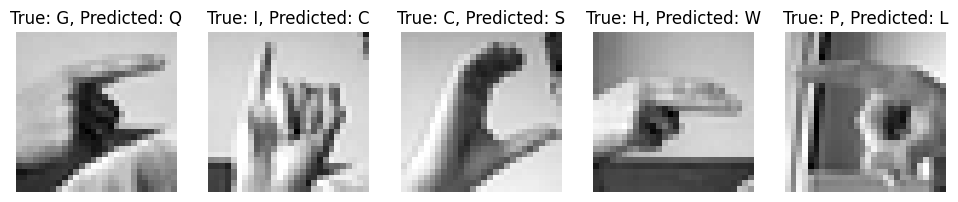

In [64]:
import string

# Función para convertir las etiquetas numéricas a letras
def convert_label_to_letter(label):
    letters = string.ascii_uppercase
    return letters[label]

# Definir una función para visualizar las imágenes con etiquetas reales y predichas
def visualize_predictions_with_letters(images, true_labels, predicted_labels):
    num_samples = len(images)
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        # Convertir las etiquetas numéricas a letras
        true_letter_label = convert_label_to_letter(true_labels[i])
        predicted_letter_label = convert_label_to_letter(predicted_labels[i])
        plt.title(f'True: {true_letter_label}, Predicted: {predicted_letter_label}')  # Utilizar la predicción directamente
        plt.axis('off')
    plt.show()

# Obtener un lote de muestras del conjunto de prueba
sample_indices = [0, 10, 20, 30, 40]  # Índices de muestras que quieres visualizar
sample_images = [X_test_norm[idx].cpu().numpy() for idx in sample_indices]
true_labels = [y_test[idx].item() for idx in sample_indices]
predicted_labels = [pred_test[idx] for idx in sample_indices]  # Usar la lista de predicciones directamente

# Visualizar las muestras seleccionadas con etiquetas reales y predichas
visualize_predictions_with_letters(sample_images, true_labels, predicted_labels)


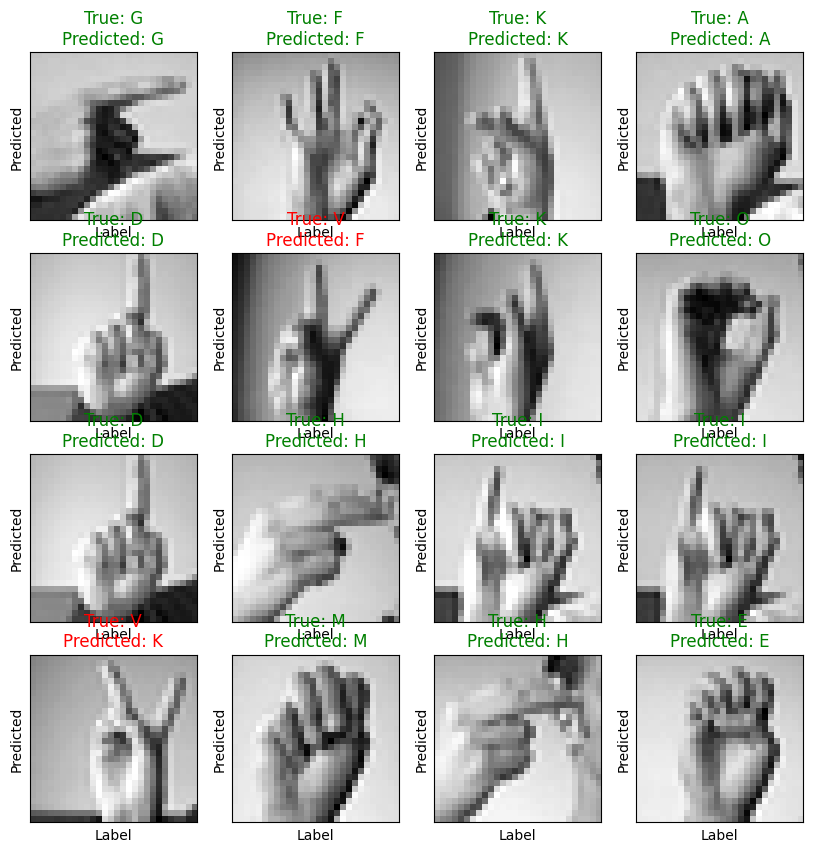

In [66]:

import string

# Función para convertir las etiquetas numéricas a letras
def convert_label_to_letter(label):
    letters = string.ascii_uppercase
    return letters[label]

# Definir una función para visualizar las imágenes con etiquetas reales y predichas
def plot_images_predictions_with_letters(images, labels_true, labels_pred, class_names, nrows, ncols, figsize=(10, 10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        # Mostrar imagen
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])  # Eliminar marcas de ejes
        # Etiqueta verdadera y etiqueta predicha
        label_true = labels_true[i]
        label_pred = labels_pred[i]
        # Si hay un nombre de clase proporcionado, úsalo para mostrar las etiquetas
        if class_names is not None:
            label_true = class_names[label_true]
            label_pred = class_names[label_pred]
        # Convertir las etiquetas numéricas a letras
        label_true = convert_label_to_letter(label_true)
        label_pred = convert_label_to_letter(label_pred)
        # Mostrar la etiqueta verdadera y predicha
        ax.set_title(f"True: {label_true}\nPredicted: {label_pred}", color=('green' if label_true == label_pred else 'red'))
        ax.set_xlabel("Label")
        ax.set_ylabel("Predicted")
        ax.set_aspect('equal')

# Seleccionar algunas imágenes y sus etiquetas verdaderas y predichas para mostrar
num_images_to_show = 16
images_to_show = X_test_norm[:num_images_to_show]
labels_true_to_show = y_test[:num_images_to_show]
# Predicciones del modelo en las imágenes seleccionadas
with torch.no_grad():
    model.eval()
    images_to_show = images_to_show.to(device)
    labels_pred_to_show = torch.argmax(model(images_to_show), dim=1).cpu().numpy()

# Graficar las imágenes con sus etiquetas verdaderas y predichas
plot_images_predictions_with_letters(images_to_show, labels_true_to_show, labels_pred_to_show, class_names=None, nrows=4, ncols=4)
plt.show()
